In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the original CSV file
csv_path = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(csv_path, encoding='ISO-8859-1')

pd.set_option('display.max_columns', len(df))

C:\Users\mguls\AppData\Local\Temp\ipykernel_18456\155199670.py:8: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='ISO-8859-1')


## Exploratory Data Analysis

In [2]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [3]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
numerical_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()

# Display missing values for the top columns with missing data
missing_values.sort_values(ascending=False).head(10)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
dtype: int64

## Data Cleaning

In [5]:
# Removing columns where more than half of the values are NaN
half_len = len(df) / 2
df_reduced = df.dropna(thresh=half_len, axis=1)

# Displaying the shape of the original, reduced, and cleaned dataframes
original_shape = df.shape
reduced_shape = df_reduced.shape

original_shape, reduced_shape

((181691, 135), (181691, 58))

## Data Transformation

In [6]:
df_reduced["ncasualties"] = df_reduced["nwound"] + df_reduced["nkill"]

C:\Users\mguls\AppData\Local\Temp\ipykernel_18456\1942105476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["ncasualties"] = df_reduced["nwound"] + df_reduced["nkill"]


In [7]:
def parse(x):
    x = str(x)
    year = x[0:4]
    month = x[4:6]
    day = x[6:8]
    return (f"{day}/{month}/{year}")
df_reduced["date"] = df_reduced["eventid"].apply(parse)

C:\Users\mguls\AppData\Local\Temp\ipykernel_18456\710910129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["date"] = df_reduced["eventid"].apply(parse)


In [8]:
# Specify the path to the new CSV file
new_csv_path = 'cleaned_data.csv'

# Save the first 5000 rows to the new CSV file
df_reduced.to_csv(new_csv_path, index=False)

## Correlation Matrix

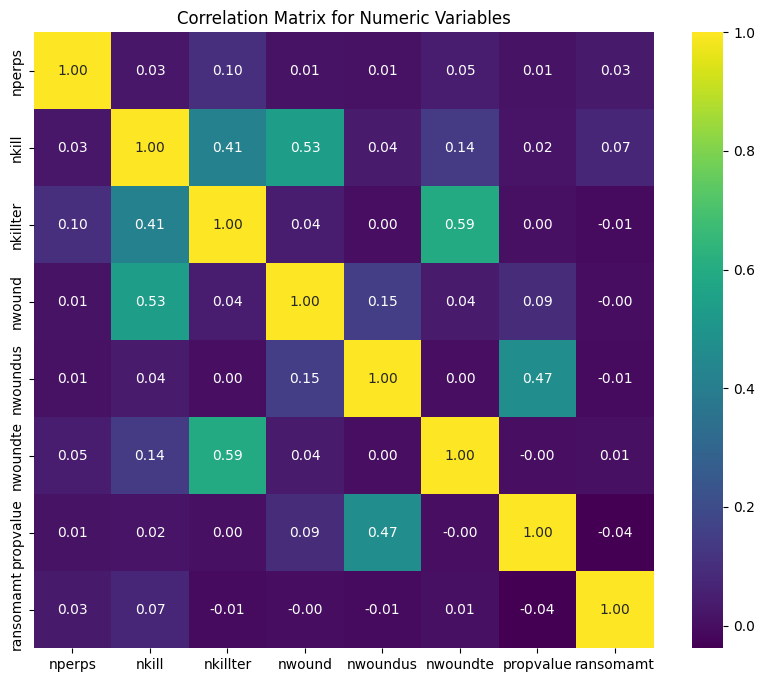

In [9]:
# Creating a correlation matrix using the specified columns
specified_columns = ['nperps',  'nkill', 'nkillter', 'nwound', 
                     'nwoundus', 'nwoundte', 'propvalue', 'ransomamt']
specified_corr_matrix = df[specified_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(specified_corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix for Numeric Variables')
plt.show()


## Distributions

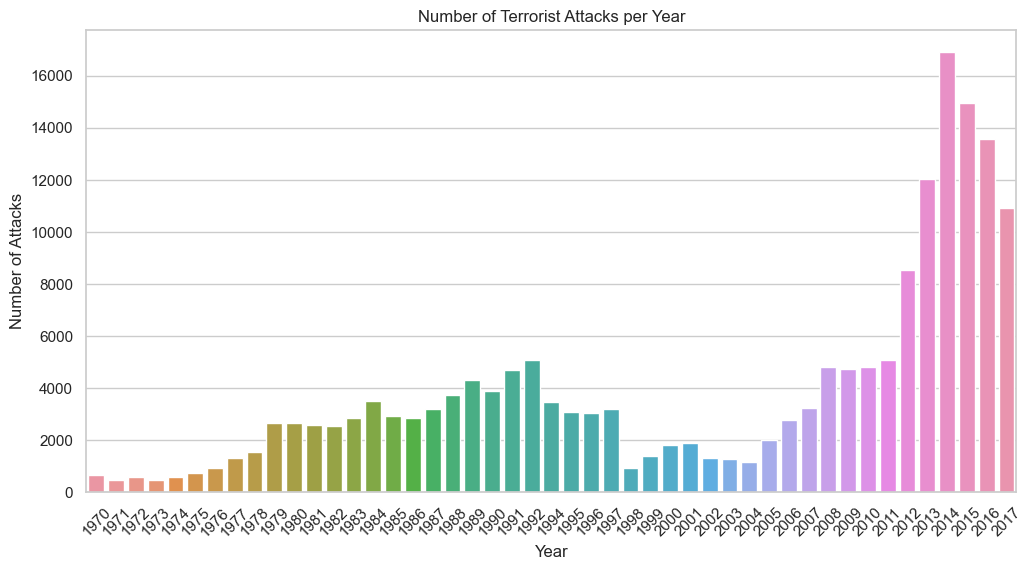

In [10]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the number of attacks over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='iyear', data=df)
plt.xticks(rotation=45)
plt.title('Number of Terrorist Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


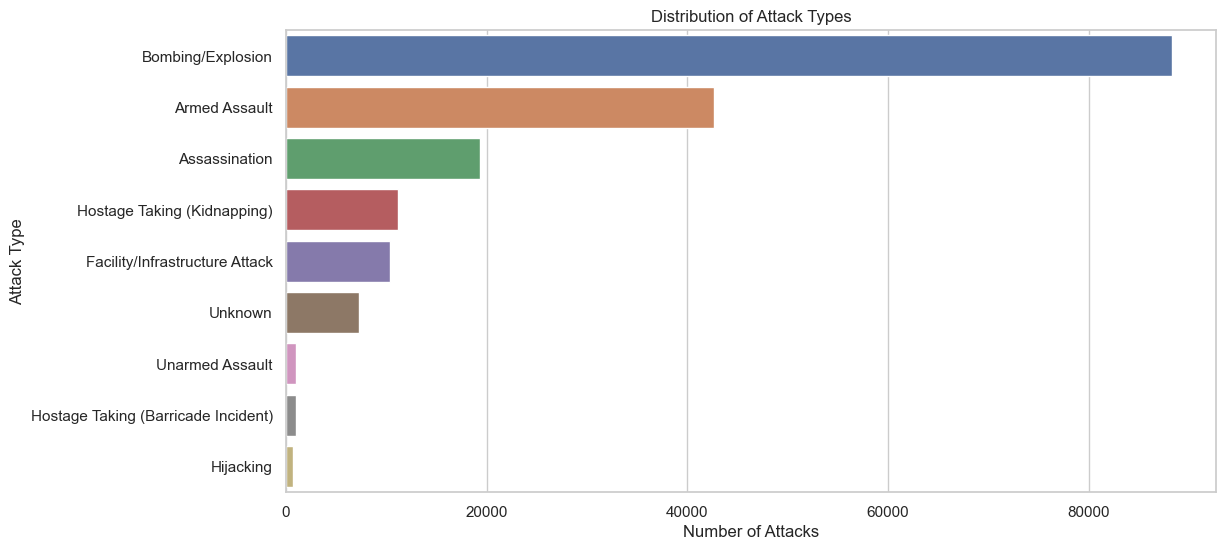

In [11]:
# Creating visualizations for the distributions
attack_type_distribution = df["attacktype1_txt"].value_counts()
# Plot for Attack Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=attack_type_distribution.index, x=attack_type_distribution.values)
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()


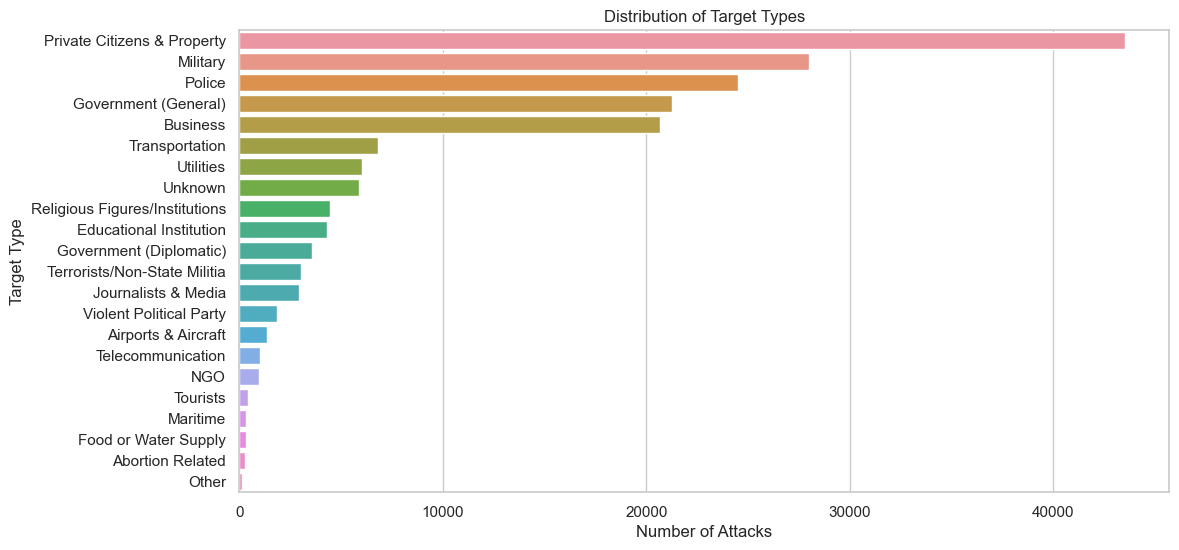

In [12]:
# Creating visualizations for the distributions
target_type_distribution = df["targtype1_txt"].value_counts()
# Plot for Attack Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=target_type_distribution.index, x=target_type_distribution.values)
plt.title('Distribution of Target Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()


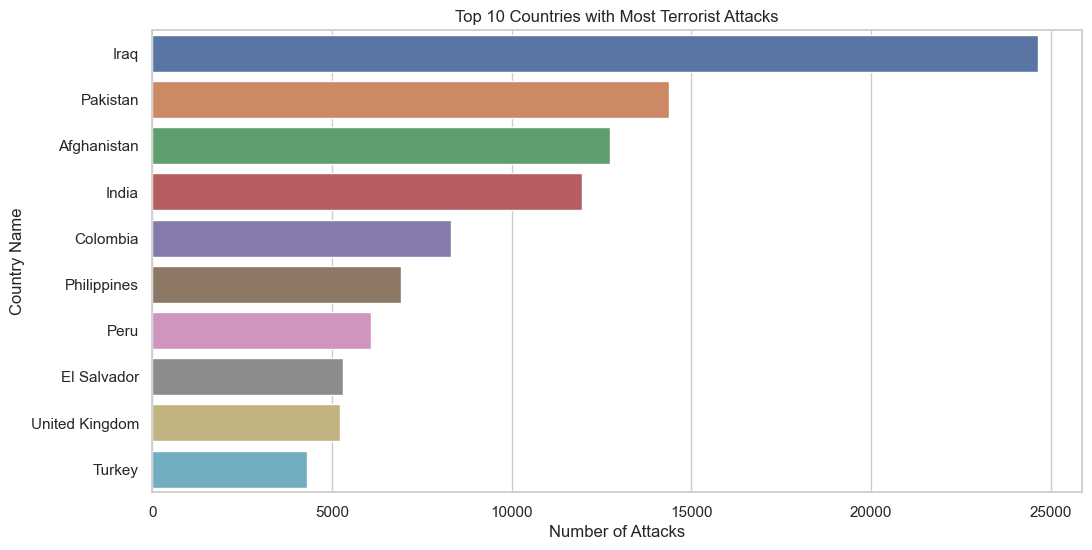

In [13]:
country_name_distribution = df["country_txt"].value_counts(sort=True).head(10)
# Plot for Top Groups Responsible for Attacks
plt.figure(figsize=(12, 6))
sns.barplot(y=country_name_distribution.index, x=country_name_distribution.values)
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country Name')
plt.show()

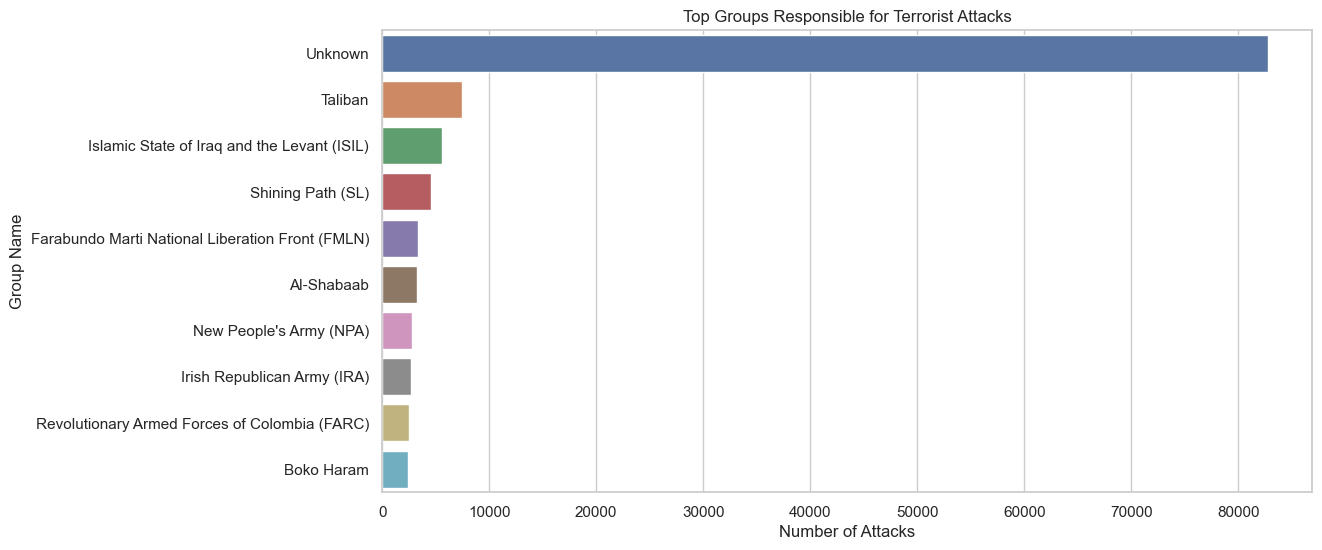

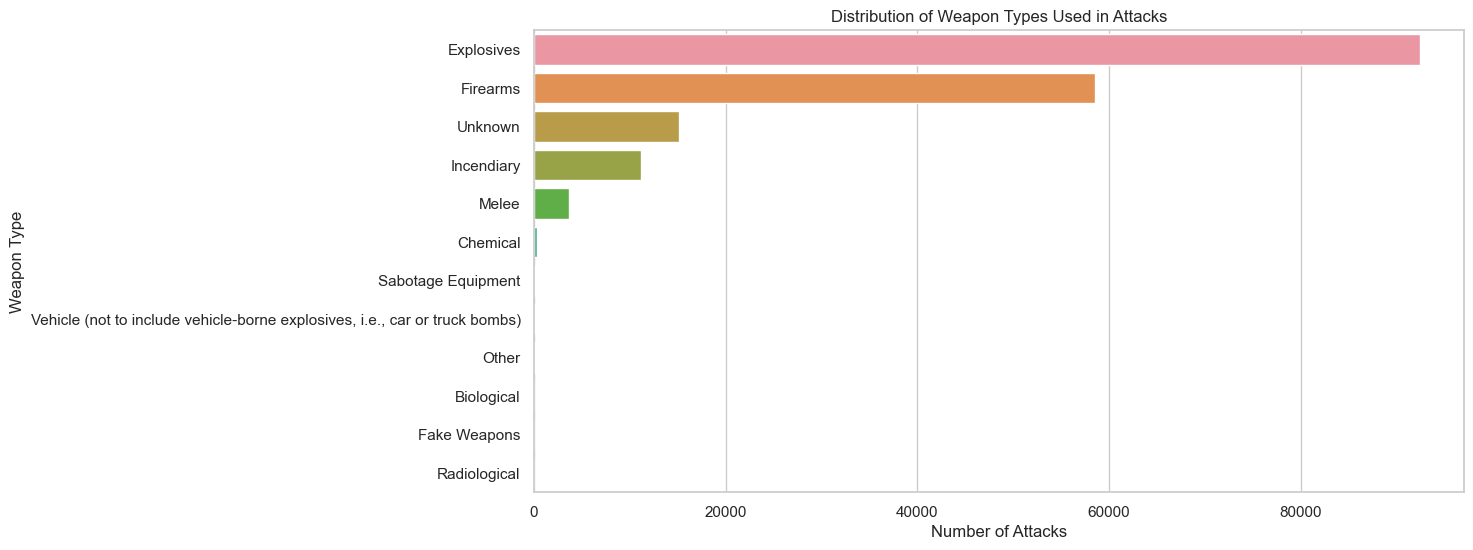

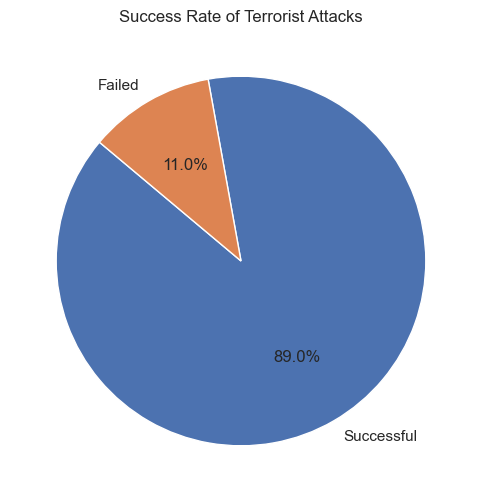

In [14]:
# Creating visualizations for the additional columns
group_name_distribution = df["gname"].value_counts(sort=True).head(10)
# Plot for Top Groups Responsible for Attacks
plt.figure(figsize=(12, 6))
sns.barplot(y=group_name_distribution.index, x=group_name_distribution.values)
plt.title('Top Groups Responsible for Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Group Name')
plt.show()

weapon_type_distribution = df["weaptype1_txt"].value_counts()
# Plot for Weapon Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=weapon_type_distribution.index, x=weapon_type_distribution.values)
plt.title('Distribution of Weapon Types Used in Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.show()

success_distribution = df["success"].value_counts()
# Plot for Success Rate of Attacks
plt.figure(figsize=(6, 6))
success_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['Successful', 'Failed'])
plt.title('Success Rate of Terrorist Attacks')
plt.ylabel('')
plt.show()


## Outliers

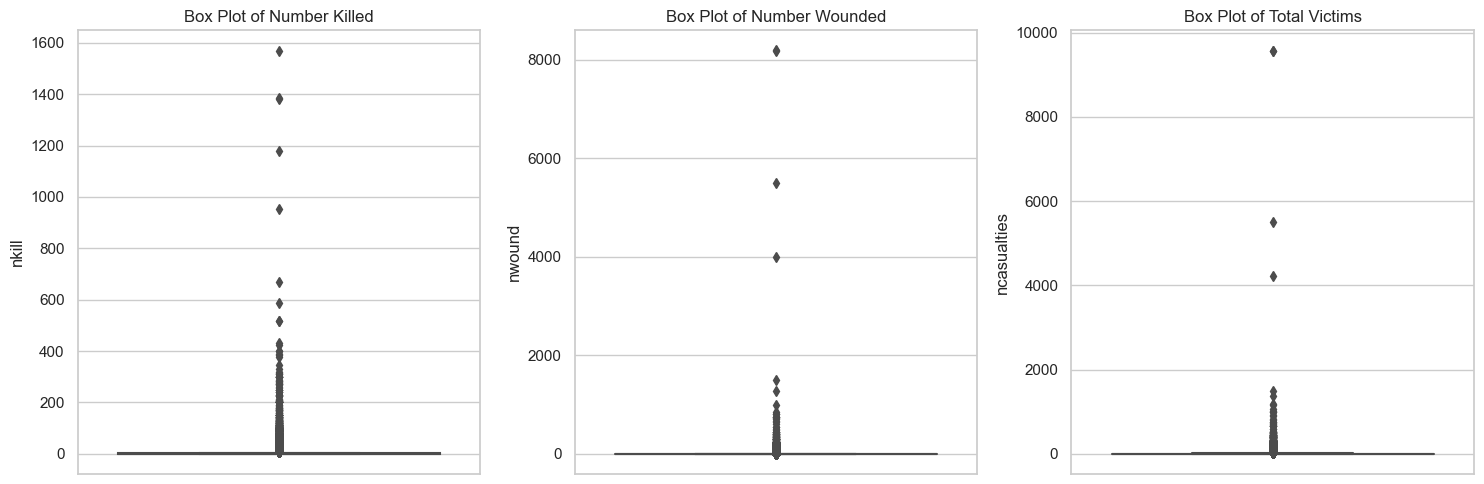

In [16]:
# Creating box plots for numerical key variables to identify potential outliers
df_cleaned = df_reduced
plt.figure(figsize=(15, 5))

# Box plot for 'nkill'
plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned['nkill'])
plt.title('Box Plot of Number Killed')

# Box plot for 'nwound'
plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned['nwound'])
plt.title('Box Plot of Number Wounded')

# Box plot for 'total_victims'
plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned['ncasualties'])
plt.title('Box Plot of Total Victims')

plt.tight_layout()
plt.show()
